# Importance of class balance in training a classification model

Rafiq Islam  
2025-08-23

When building a **classification model**, one of the most important —
and often overlooked — aspects is **class balance**. Class balance
refers to how evenly distributed the categories (or classes) in our
dataset are. Getting this wrong can cause our model to fail silently,
producing high accuracy but poor performance in practice.

## What is Class Balance and Why Does it Matter?

Imagine you’re training a model to detect credit card fraud. Out of
100,000 transactions, maybe only 500 are fraudulent — that’s **0.5%
fraud cases vs. 99.5% normal cases**. This dataset is **imbalanced**,
because one class (normal transactions) dominates the other.<br> <br> On
the other hand, if you had 50,000 fraud cases and 50,000 normal cases,
the dataset would be **balanced**, meaning each class contributes
equally to training.

1.  **Misleading Accuracy**

    -   If 99.5% of your data is “normal,” a model that predicts
        *everything as normal* would be **99.5% accurate** — but it’s
        useless for catching fraud.

2.  **Biased Learning**

    -   Machine learning algorithms tend to optimize for the majority
        class, learning little to nothing about the minority class.

3.  **Real-World Risks**

    -   In fraud detection, medical diagnosis, or spam filtering, the
        minority class is usually the one we *care about most*. Missing
        these cases can have huge consequences.

## Strategies to Handle Class Imbalance

### 1. **Resampling Techniques**

-   **Oversampling minority class** (e.g., SMOTE — Synthetic Minority
    Oversampling Technique)
-   **Undersampling majority class** to reduce dominance

Useful when we want to directly modify the training dataset.

### 2. **Algorithmic Approaches**

-   Use models that handle imbalance better, like **tree-based models**
    (Random Forest, XGBoost) with class weights.
-   Adjust **class weights** in algorithms (e.g.,
    `class_weight='balanced'` in scikit-learn).

### 3. **Evaluation Metrics Beyond Accuracy**

Accuracy isn’t enough. We use:

-   **Precision & Recall** (focus on the minority class)
-   **F1-score** (balance between precision & recall)
-   **ROC-AUC / PR-AUC** (good for imbalance scenarios)

### 4. **Data Collection & Domain Knowledge**

Sometimes the best solution is **collecting more samples of the minority
class** or applying **domain-specific rules** to aid the model.

## Randomization

Another desirable characteristic we want in the data is the
randomization of all classes. If your dataset is ordered (e.g., first
all “Class 0” rows, then all “Class 1” rows), most machine learning
algorithms will process it sequentially. Without randomization
(shuffling), we risk:

-   The model learning from only one class at the start, delaying
    convergence.  
-   Batch-based algorithms (like stochastic gradient descent, mini-batch
    training) seeing batches with only one class implies poor updates.

Solution: We should shuffle our data before splitting into train/test
and before feeding into training.

-   In *scikit-learn*: `train_test_split(..., shuffle=True)`
    (default).  
-   In *PyTorch / TensorFlow*: `DataLoader(..., shuffle=True)`.

Randomization is crucial before splitting, otherwise we may end up with:

-   Train set = only majority class  
-   Test set = only minority class

leading to meaningless evaluation. So, we should always shuffle, and in
imbalanced data, consider stratified splitting (preserves class ratios
in both sets: `train_test_split(X, y, stratify=y)`)

## Example

Let’s explain everything with the famous *IRIS* dataset from the
`seaborn` library.

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

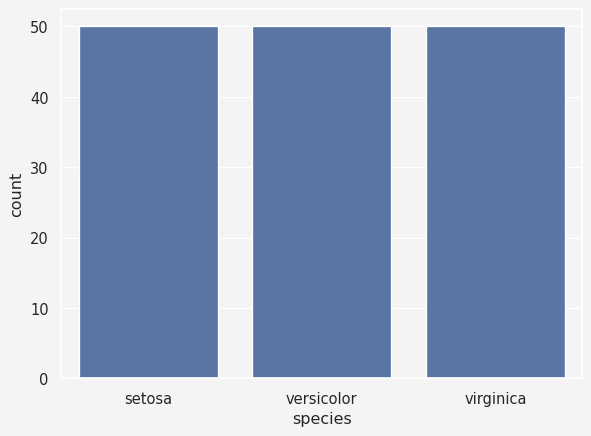

In [2]:
import torch
import torch.nn as nn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
iris = sns.load_dataset('iris')
data = torch.tensor(iris[iris.columns[0:4]].values).float()
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=='versicolor']=1
labels[iris.species=='virginica']=2
sns.countplot(x="species", data=iris)
print(labels)

> **Important**
>
> As we can see that the number of observation is 150. So, if we just
> directly split this data into 70-30 or 80-20 training-test ratio then
> the training data will be an imbalanced data.

In [3]:
trainProp = 0.8
numTrainData = int(len(labels)*trainProp)
trainTestB = np.zeros(len(labels), dtype=bool)
trainTestB[range(numTrainData)] = True
trainTestB

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False,

Let’s check if the dataset is balanced

In [4]:
print('Class average in full dataset')
print(torch.mean(labels.float()))
print('')
print('Class average in the training proportion')
print(torch.mean(labels[trainTestB].float()))
print('')
print('Class average in the test proportion')
print(torch.mean(labels[~trainTestB].float()))

Class average in full dataset
tensor(1.)

Class average in the training proportion
tensor(0.7500)

Class average in the test proportion
tensor(2.)

> **Note**
>
> Note that the average in all cases should be either 1 or very close to
> one, as we have 0,1, and 2 classes.

In [5]:
actualTrain = np.random.choice(range(len(labels)), numTrainData, replace=False)
trainTestB = np.zeros(len(labels), dtype=bool)
trainTestB[actualTrain] = True
print('Class average in the training proportion')
print(torch.mean(labels[trainTestB].float()))
print('')
print('Class average in the test proportion')
print(torch.mean(labels[~trainTestB].float()))

Class average in the training proportion
tensor(0.9500)

Class average in the test proportion
tensor(1.2000)

Modeling

In [6]:
iris_classifier = nn.Sequential(
    nn.Linear(4, 64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,3)
)
loss_fun = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(iris_classifier.parameters(), lr=0.01)

Data Structure

In [7]:
print('Full data shape')
print(data.shape)
print(' ')
print('Training data shape')
print(data[trainTestB, :].shape)
print(' ')
print('Test data shape')
print(data[~trainTestB, :].shape)

Full data shape
torch.Size([150, 4])
 
Training data shape
torch.Size([120, 4])
 
Test data shape
torch.Size([30, 4])

Next, train and test the model

In [8]:
nEpochs = 1000
losses = torch.zeros(nEpochs)
accuracy_track = []

for epoch in range(nEpochs):
    # forward pass
    yHat = iris_classifier(data[trainTestB,:])
    # compute accuracy
    accuracy_track.append(
        100*torch.mean(
            (torch.argmax(yHat, axis=1)==labels[trainTestB]
        ).float())
    )
    # compute loss
    loss = loss_fun(yHat, labels[trainTestB])
    losses[epoch] = loss

    # back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

After training, now we can use our model to compute train and test
accuracies

In [9]:
pred = iris_classifier(data[trainTestB, :])
training_accuracy = 100 * torch.mean(
    (torch.argmax(pred, axis=1)==labels[trainTestB]).float()
)
pred = iris_classifier(data[~trainTestB, :])
test_accuracy = 100 * torch.mean(
    (torch.argmax(pred, axis=1)==labels[~trainTestB]).float()
)
print('Accuracy on training data: %g%%' %training_accuracy)
print('Accuracy on test data: %g%%' %test_accuracy)

Accuracy on training data: 98.3333%
Accuracy on test data: 96.6667%

Instead of manual splitting, we could also use `sklearn` library and
obtain similar results

In [10]:
def modeling():
    iris_classifier = nn.Sequential(
        nn.Linear(4, 64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.ReLU(),
        nn.Linear(64,3)
    )
    loss_fun = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(iris_classifier.parameters(), lr=0.01)
    return iris_classifier, loss_fun, optimizer

nEpochs = 200
X_train, X_test, y_train, y_test = train_test_split(
        data, labels, train_size=trainProp
    )
def model_training():
    losses = torch.zeros(nEpochs)
    training_accuracy = []
    test_accuracy = []
    for epoch in range(nEpochs):
        # forward pass
        yHat = iris_classifier(X_train)
        loss = loss_fun(yHat, y_train)

        # back propagation 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # compute training accuracy
        training_accuracy.append(
            100*torch.mean((torch.argmax(yHat, axis=1)==y_train).float()).item()
        )
        # compute test accuracy
        predtest = torch.argmax(iris_classifier(X_test), axis=1)
        test_accuracy.append(
            100*torch.mean((predtest==y_test).float()).item()
        )
    return training_accuracy, test_accuracy

Now we re-train the model

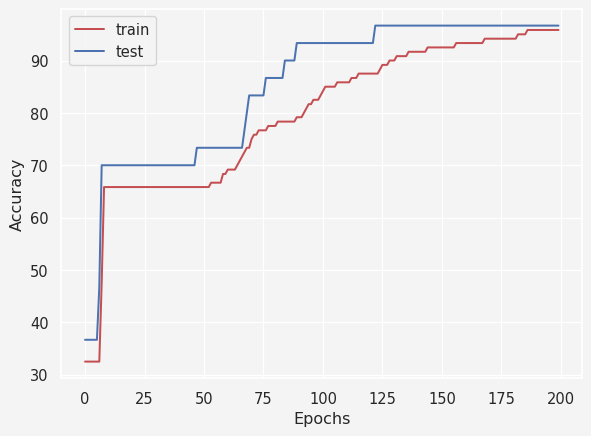

In [11]:
iris_classifier, loss_fun, optimizer = modeling()
train_acc, test_acc = model_training()
plt.plot(train_acc, 'r-', label='train')
plt.plot(test_acc, 'b-', label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Share on**

<a href="https://www.facebook.com/sharer.php?u=https://rispace.github.io/posts/classbalance/" target="_blank" style="color:#1877F2; text-decoration: none;">

</a>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https://rispace.github.io/posts/classbalance/" target="_blank" style="color:#0077B5; text-decoration: none;">

</a>

<a href="https://www.twitter.com/intent/tweet?url=https://rispace.github.io/posts/classbalance/" target="_blank" style="color:#1DA1F2; text-decoration: none;">

</a>

**You may also like**